<a href="https://colab.research.google.com/github/YanggWendy/FYP-Portfolio-Management-System/blob/main/FYP_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'FYP Data/'
assert FOLDERNAME is not None, "[1]Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [4]:
!pip install yfinance
!pip install fundamentalanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
PATH = '/content/drive/My Drive/FYP Data/' 

In [6]:
!ls "drive/My Drive/FYP Data/"

 er_return.csv		'sp500 data.csv'	'stock data_2.csv'
 label.csv		'sp500 data final.csv'	'stock data.csv'
 multi_factor.csv	'sp500 index.csv'	'stock data month.csv'
 multi_factor_data.csv	'sp500 w label.csv'	 test.csv
 price.csv		'stock data_1.csv'	 weights.h5


In [7]:
import yfinance as yf
import pandas as pd
from tqdm.notebook import tqdm
import statistics
import fundamentalanalysis as fa
import datetime
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get Ticker

In [8]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
data_table[0]
SP500_ticker = data_table[0]['Symbol'].tolist()

#remove invalid stock ticker
SP500_ticker.remove('BRK.B')
SP500_ticker.remove('BF.B')
SP500_ticker.remove('GEHC')

SP500_ticker

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',


In [ ]:
data = yf.download(SP500_ticker, period='max', interval="1d", group_by='tickers')
data

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: 1d data not available for startTime=-2208994789 and endTime=1675667595. Only 100 years worth of day granularity data are allowed to be fetched per request.


JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
1962-01-02 00:00:00-05:00        NaN        NaN        NaN        NaN   
1962-01-03 00:00:00-05:00        NaN        NaN        NaN        NaN   
1962-01-04 00:00:00-05:00        NaN        NaN        NaN        NaN   
1962-01-05 00:00:00-05:00        NaN        NaN        NaN        NaN   
1962-01-08 00:00:00-05:00        NaN        NaN        NaN        NaN   
...                              ...        ...        ...        ...   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-02-01 00:00:00-05:00  30.360001  31.040001  29.690001  30.990000   
2023-02-02 00:00:00-05:00  31.299999  31.690001  30.910000  31.450001   
2023-02-03 00:00:00-05:00  31.240000  31.240000  30.549999  30.730000   

                                                        JBHT              \
                           Adj Close      Volume        Open        High   
Date                                                                       
1962-01-02 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-03 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-04 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-05 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-08 00:00:00-05:00        NaN         NaN         NaN         NaN   
...                              ...         ...         ...         ...   
2023-01-30 00:00:00-05:00  32.130001   5230100.0  190.199997  190.509995   
2023-01-31 00:00:00-05:00  32.299999   7324600.0  185.800003  189.169998   
2023-02-01 00:00:00-05:00  30.990000  11328000.0  189.910004  197.190002   
2023-02-02 00:00:00-05:00  31.450001   6784900.0  197.210007  200.639999   
2023-02-03 00:00:00-05:00  30.730000   7508500.0  194.509995  198.509995   

                                                   ...         JNJ  \
                                  Low       Close  ...         Low   
Date                                               ...               
1962-01-02 00:00:00-05:00         NaN         NaN  ...    0.222222   
1962-01-03 00:00:00-05:00         NaN         NaN  ...    0.219907   
1962-01-04 00:00:00-05:00         NaN         NaN  ...    0.217593   
1962-01-05 00:00:00-05:00         NaN         NaN  ...    0.214120   
1962-01-08 00:00:00-05:00         NaN         NaN  ...    0.210648   
...                               ...         ...  ...         ...   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  161.080002   
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  161.050003   
2023-02-01 00:00:00-05:00  188.100006  195.960007  ...  162.399994   
2023-02-02 00:00:00-05:00  196.110001  197.350006  ...  162.820007   
2023-02-03 00:00:00-05:00  192.529999  197.889999  ...  163.889999   

                                                                     BBY  \
                                Close   Adj Close      Volume       Open   
Date                                                                       
1962-01-02 00:00:00-05:00    0.223380    0.066455         0.0        NaN   
1962-01-03 00:00:00-05:00    0.219907    0.065422    345600.0        NaN   
1962-01-04 00:00:00-05:00    0.217593    0.064734    216000.0        NaN   
1962-01-05 00:00:00-05:00    0.214120    0.063701    129600.0        NaN   
1962-01-08 00:00:00-05:00    0.210648    0.062668    172800.0        NaN   
...                               ...         ...         ...        ...   
2023-01-30 00:00:00-05:00  162.000000  162.000000  23259100.0  84.449997   
2023-01-31 00:00:00-05:00  163.419998  163.419998  11612500.0  86.910004   
2023-02-01 00:00:00-05:00  164.919998  164.919998   9865300.0  88.260002   
2023-02-02 00:00:00-05:00  165.539993  165.539993  

In [ ]:
#data.to_csv("drive/My Drive/FYP Data/price.csv",index=True)

# Get Technical list

In [9]:
Technical_list = ['Close','Volume','VEMA12','VSTD20','V20','AR','BR','AU','AD']

#Get Technical data 

In [ ]:
stock_data = data.reindex(index=data.index[::-1])
stock_data = stock_data['1993-01-29':'2023-01-31']
stock_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   
...                              ...        ...        ...        ...   
1993-02-05 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-04 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-03 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-02 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-01 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   
...                              ...        ...         ...         ...   
1993-02-05 00:00:00-05:00        NaN        NaN    5.812500    5.812500   
1993-02-04 00:00:00-05:00        NaN        NaN    5.937500    5.937500   
1993-02-03 00:00:00-05:00        NaN        NaN    6.312500    6.312500   
1993-02-02 00:00:00-05:00        NaN        NaN    6.125000    6.250000   
1993-02-01 00:00:00-05:00        NaN        NaN    6.000000    6.218750   

                                                   ...         JNJ  \
                                  Low       Close  ...         Low   
Date                                               ...               
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  161.050003   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  161.080002   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  167.770004   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  168.649994   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  167.080002   
...                               ...         ...  ...         ...   
1993-02-05 00:00:00-05:00    5.500000    5.531250  ...   11.156250   
1993-02-04 00:00:00-05:00    5.687500    5.812500  ...   11.250000   
1993-02-03 00:00:00-05:00    5.812500    5.875000  ...   10.750000   
1993-02-02 00:00:00-05:00    6.125000    6.187500  ...   10.781250   
1993-02-01 00:00:00-05:00    6.000000    6.218750  ...   10.968750   

                                                                     BBY  \
                                Close   Adj Close      Volume       Open   
Date                                                                       
2023-01-31 00:00:00-05:00  163.419998  163.419998  11612500.0  86.910004   
2023-01-30 00:00:00-05:00  162.000000  162.000000  23259100.0  84.449997   
2023-01-27 00:00:00-05:00  168.229996  168.229996   6054500.0  83.580002   
2023-01-26 00:00:00-05:00  168.889999  168.889999   6946100.0  84.550003   
2023-01-25 00:00:00-05:00  169.509995  169.509995   7099800.0  82.980003   
...                               ...         ...         ...        ...   
1993-02-05 00:00:00-05:00   11.250000    5.545273   6490000.0   1.703704   
1993-02-04 00:00:00-05:00   11.406250    5.622291   6658400.0   1.564815   
1993-02-03 00:00:00-05:00   11.312500    5.576081   7908400.0   1.518519   
1993-02-02 00:00:00-05:00   10.875000    5.360433  10696000.0   1

##12 day Volumn MA

In [ ]:
#stock_data = pd.read_csv(("drive/My Drive/FYP Data/price.csv"),index_col = [0])

In [ ]:
for ticker in tqdm(SP500_ticker):
  #VEMA12
  stock_data_test = stock_data
  stock_TV = stock_data_test[ticker]['Volume'].tolist()

  counter = 0
  TV_MA12 = 0
  TV_MA12_stock_TV = []
  for i in range(len(stock_TV)):
    if len(stock_TV) - i >= 12:
      for j in range(12):
        TV_MA12 += stock_TV[i+j]

      TV_MA12_stock_TV.append(TV_MA12/12)
      TV_MA12 = 0
  while len(TV_MA12_stock_TV) != len(stock_TV):
    TV_MA12_stock_TV.append(0)

  stock_data_test[ticker,"VEMA12"] = TV_MA12_stock_TV


  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
stock_data_test['FRT']

,Open,High,Low,Close,Adj Close,Volume,VEMA12
Date,,,,,,,
2023-01-31 00:00:00-05:00,109.940002,111.980003,108.860001,111.529999,111.529999,2776400.0,657541.666667
2023-01-30 00:00:00-05:00,111.370003,111.480003,109.860001,109.970001,109.970001,468700.0,480183.333333
2023-01-27 00:00:00-05:00,110.239998,111.820000,110.169998,111.379997,111.379997,660200.0,490933.333333
2023-01-26 00:00:00-05:00,111.449997,111.449997,109.529999,110.250000,110.250000,405200.0,473833.333333
2023-01-25 00:00:00-05:00,109.639999,110.480003,108.650002,110.480003,110.480003,390900.0,467066.666667
...,...,...,...,...,...,...,...
1993-02-05 00:00:00-05:00,26.000000,26.375000,26.000000,26.125000,6.134582,31700.0,0.000000
1993-02-04 00:00:00-05:00,25.500000,26.250000,25.500000,26.125000,6.134582,54200.0,0.000000
1993-02-03 00:00:00-05:00,25.875000,25.875000,25.250000,25.375000,5.958468,40100.0,0.000000


In [ ]:
#VSTD20
for ticker in tqdm(SP500_ticker):
  stock_TV = stock_data[ticker]['Volume'].tolist()

  counter = 0
  VSTD20 = []
  VSTD20_stock_TV = []
  for i in range(len(stock_TV)):
    if len(stock_TV) - i >= 20:
      for j in range(20):
        VSTD20.append(stock_TV[i+j])

      VSTD20_stock_TV.append(statistics.stdev(VSTD20))
      VSTD20 = []
  #print(len(VSTD20_stock_TV))
  while len(VSTD20_stock_TV) != len(stock_TV):
    VSTD20_stock_TV.append(0)

  stock_data_test[ticker,"VSTD20"] = VSTD20_stock_TV


  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#V20
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  V20 = []
  V20_temp = []
  V20_AR = []


  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 252:
        V20_AR.append((stock_Close[i] - stock_Close[i+ 251])/stock_Close[i+ 251])

  while len(V20_AR) != len(stock_Open):
    V20_AR.append(0)

  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 20:
      for j in range(20):
        V20_temp.append(V20_AR[i+j])
      V20.append(statistics.stdev(V20_temp))
      V20_temp = []
  while len(V20) != len(stock_Open):
    V20.append(0)
  stock_data_test[ticker,"V20"] = V20

  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#AR
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AR = []
  AR_HOGap = []
  AR_OLGap = []

  for i in range(len(stock_Open)):
    if len(stock_Open) - i >= 26:
      for j in range(26):
        AR_HOGap.append(stock_High[i+j]-stock_Open[i+j])
        AR_OLGap.append(stock_Open[i+j]-stock_Low[i+j])
      if sum(AR_OLGap) == 0:
        break
      AR.append(sum(AR_HOGap)*100/sum(AR_OLGap))
      AR_HOGap = []
      AR_OLGap = []

  while len(AR) != len(stock_Open):
    AR.append(0)
  stock_data[ticker,"AR"] = AR

  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#BR
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  BR = []
  BR_HCGap = []
  BR_CLGap = []

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 26:
      for j in range(26):
        BR_HCGap.append(stock_High[i+j]-stock_Close[i+j+1])
        BR_CLGap.append(stock_Close[i+j+1]-stock_Low[i+j])
      if sum(BR_CLGap) == 0:
        break
      BR.append(sum(BR_HCGap)/sum(BR_CLGap))
      BR_HCGap = []
      BR_CLGap = []

  while len(BR) != len(stock_Open):
    BR.append(0)
  stock_data[ticker,"BR"] = BR

  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#AU Aroon up
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AU = []
  AU_period = 25
  AU_High = []
  AU_High_index = 0

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 25:
      for j in range(25):
        AU_High.append(stock_High[1+i+j])

      AU_High_index = AU_High.index(max(AU_High))
      AU.append((AU_period - AU_High_index)/AU_period)
      AU_High = []
      AU_High_index = 0

  while len(AU) != len(stock_Open):
    AU.append(0)
  stock_data[ticker,"AU"] = AU

  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#AD Aroon down
for ticker in tqdm(SP500_ticker):
  stock_Open = stock_data[ticker]['Open'].tolist()
  stock_High = stock_data[ticker]['High'].tolist()
  stock_Low = stock_data[ticker]['Low'].tolist()
  stock_Close = stock_data[ticker]['Close'].tolist()

  AD = []
  AD_period = 25
  AD_LOW = []
  AD_LOW_index = 0

  for i in range(len(stock_Open)):
    if len(stock_Open) - i > 25:
      for j in range(25):
        AD_LOW.append(stock_Low[1+i+j])

      AD_LOW_index = AD_LOW.index(min(AD_LOW))
      AD.append((AD_period - AD_LOW_index)/AD_period)
      AD_LOW = []
      AD_LOW_index = 0

  while len(AD) != len(stock_Open):
    AD.append(0)
  stock_data[ticker,"AD"] = AD

  0%|          | 0/503 [00:00<?, ?it/s]

In [ ]:
#VOL10
stock_data['CTLT']

,Open,High,Low,Close,Adj Close,Volume,VEMA12,VSTD20,V20,AR,BR,AU,AD
Date,,,,,,,,,,,,,
2023-01-31 00:00:00-05:00,52.830002,53.590000,52.299999,53.549999,53.549999,1417200.0,2.369883e+06,798169.740818,0.054330,142.871857,1.369855,1.00,0.04
2023-01-30 00:00:00-05:00,52.730000,54.349998,52.570000,52.580002,52.580002,2865000.0,2.400900e+06,756075.712218,0.057559,133.398754,1.294543,1.00,0.08
2023-01-27 00:00:00-05:00,52.250000,54.119999,51.930000,53.650002,53.650002,1747700.0,2.433650e+06,783194.601935,0.058604,127.032179,1.312591,0.92,0.12
2023-01-26 00:00:00-05:00,50.939999,52.320000,50.709999,52.270000,52.270000,2810300.0,2.663633e+06,823387.128669,0.056930,115.170054,1.080009,0.96,0.04
2023-01-25 00:00:00-05:00,49.000000,50.189999,48.389999,50.160000,50.160000,1174300.0,2.660933e+06,866149.067196,0.054603,105.398954,0.900682,1.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-02-05 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1993-02-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1993-02-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00,0.00


In [ ]:
stock_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   
...                              ...        ...        ...        ...   
1993-02-05 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-04 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-03 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-02 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-01 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   
...                              ...        ...         ...         ...   
1993-02-05 00:00:00-05:00        NaN        NaN    5.812500    5.812500   
1993-02-04 00:00:00-05:00        NaN        NaN    5.937500    5.937500   
1993-02-03 00:00:00-05:00        NaN        NaN    6.312500    6.312500   
1993-02-02 00:00:00-05:00        NaN        NaN    6.125000    6.250000   
1993-02-01 00:00:00-05:00        NaN        NaN    6.000000    6.218750   

                                                   ...   WTW   GWW  WYNN  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.04  0.36  0.20   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  0.08  0.40  0.24   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  0.04  0.44  0.28   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  0.04  0.48  0.32   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  0.04  0.52  0.36   
...                               ...         ...  ...   ...   ...   ...   
1993-02-05 00:00:00-05:00    5.500000    5.531250  ...  0.00  0.00  0.00   
1993-02-04 00:00:00-05:00    5.687500    5.812500  ...  0.00  0.00  0.00   
1993-02-03 00:00:00-05:00    5.812500    5.875000  ...  0.00  0.00  0.00   
1993-02-02 00:00:00-05:00    6.125000    6.187500  ...  0.00  0.00  0.00   
1993-02-01 00:00:00-05:00    6.000000    6.218750  ...  0.00  0.00  0.00   

                            XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
                             AD    AD    AD    AD    AD    AD    AD  
Date                                                                 
2023-01-31 00:00:00-05:00  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30 00:00:00-05:00  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27 00:00:00-05:00  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26 00:00:00-05:00  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25 00:00:00-05:00  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...                         ...   ...   ...   ...   ...   ...   ...  
1993-02-05 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-04 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02 00:00:00-05:00  0.00  0.00  0.00  0.00  0.

In [ ]:
stock_data.to_csv("drive/My Drive/FYP Data/stock data.csv",index=True, header=True )

In [ ]:
stock_data = pd.read_csv("drive/My Drive/FYP Data/stock data.csv",index_col = 0,header = [0,1])
stock_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   
...                              ...        ...        ...        ...   
1993-02-05 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-04 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-03 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-02 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-01 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   
...                              ...        ...         ...         ...   
1993-02-05 00:00:00-05:00        NaN        NaN    5.812500    5.812500   
1993-02-04 00:00:00-05:00        NaN        NaN    5.937500    5.937500   
1993-02-03 00:00:00-05:00        NaN        NaN    6.312500    6.312500   
1993-02-02 00:00:00-05:00        NaN        NaN    6.125000    6.250000   
1993-02-01 00:00:00-05:00        NaN        NaN    6.000000    6.218750   

                                                   ...   WTW   GWW  WYNN  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.04  0.36  0.20   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  0.08  0.40  0.24   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  0.04  0.44  0.28   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  0.04  0.48  0.32   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  0.04  0.52  0.36   
...                               ...         ...  ...   ...   ...   ...   
1993-02-05 00:00:00-05:00    5.500000    5.531250  ...  0.00  0.00  0.00   
1993-02-04 00:00:00-05:00    5.687500    5.812500  ...  0.00  0.00  0.00   
1993-02-03 00:00:00-05:00    5.812500    5.875000  ...  0.00  0.00  0.00   
1993-02-02 00:00:00-05:00    6.125000    6.187500  ...  0.00  0.00  0.00   
1993-02-01 00:00:00-05:00    6.000000    6.218750  ...  0.00  0.00  0.00   

                            XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
                             AD    AD    AD    AD    AD    AD    AD  
Date                                                                 
2023-01-31 00:00:00-05:00  0.76  0.80  0.28  0.04  0.72  0.04  0.40  
2023-01-30 00:00:00-05:00  0.80  0.84  0.32  0.08  0.76  0.08  0.44  
2023-01-27 00:00:00-05:00  0.84  0.88  0.36  0.12  0.80  0.04  0.04  
2023-01-26 00:00:00-05:00  0.88  0.92  0.40  0.16  0.84  0.04  0.08  
2023-01-25 00:00:00-05:00  0.92  0.96  0.44  0.20  0.88  0.08  0.12  
...                         ...   ...   ...   ...   ...   ...   ...  
1993-02-05 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-04 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-03 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-02-02 00:00:00-05:00  0.00  0.00  0.00  0.00  0.

In [ ]:
SP500 = pd.read_csv("drive/My Drive/FYP Data/stock data.csv",index_col = 0,header = [0,1])
SP500

#Add Monthly Return

In [ ]:
SP500['date'] = SP500.index.values
SP500

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   
...                              ...        ...        ...        ...   
1993-02-05 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-04 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-03 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-02 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-01 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   
...                              ...        ...         ...         ...   
1993-02-05 00:00:00-05:00        NaN        NaN    5.812500    5.812500   
1993-02-04 00:00:00-05:00        NaN        NaN    5.937500    5.937500   
1993-02-03 00:00:00-05:00        NaN        NaN    6.312500    6.312500   
1993-02-02 00:00:00-05:00        NaN        NaN    6.125000    6.250000   
1993-02-01 00:00:00-05:00        NaN        NaN    6.000000    6.218750   

                                                   ...   GWW  WYNN   XEL  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.36  0.20  0.76   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  0.40  0.24  0.80   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  0.44  0.28  0.84   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  0.48  0.32  0.88   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  0.52  0.36  0.92   
...                               ...         ...  ...   ...   ...   ...   
1993-02-05 00:00:00-05:00    5.500000    5.531250  ...  0.00  0.00  0.00   
1993-02-04 00:00:00-05:00    5.687500    5.812500  ...  0.00  0.00  0.00   
1993-02-03 00:00:00-05:00    5.812500    5.875000  ...  0.00  0.00  0.00   
1993-02-02 00:00:00-05:00    6.125000    6.187500  ...  0.00  0.00  0.00   
1993-02-01 00:00:00-05:00    6.000000    6.218750  ...  0.00  0.00  0.00   

                            XYL   YUM  ZBRA   ZBH  ZION   ZTS  \
                             AD    AD    AD    AD    AD    AD   
Date                                                            
2023-01-31 00:00:00-05:00  0.80  0.28  0.04  0.72  0.04  0.40   
2023-01-30 00:00:00-05:00  0.84  0.32  0.08  0.76  0.08  0.44   
2023-01-27 00:00:00-05:00  0.88  0.36  0.12  0.80  0.04  0.04   
2023-01-26 00:00:00-05:00  0.92  0.40  0.16  0.84  0.04  0.08   
2023-01-25 00:00:00-05:00  0.96  0.44  0.20  0.88  0.08  0.12   
...                         ...   ...   ...   ...   ...   ...   
1993-02-05 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00   
1993-02-04 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00   
1993-02-03 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00   
1993-02-02 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00   
1993-02-01 00:00:00-05:00  0.00  0.00  0.00  0.0

In [ ]:
SP500['date'] = pd.to_datetime(SP500['date'])
SP500.head()

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   

                                                   ...   GWW  WYNN   XEL  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.36  0.20  0.76   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  0.40  0.24  0.80   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  0.44  0.28  0.84   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  0.48  0.32  0.88   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  0.52  0.36  0.92   

                            XYL   YUM  ZBRA   ZBH  ZION   ZTS  \
                             AD    AD    AD    AD    AD    AD   
Date                                                            
2023-01-31 00:00:00-05:00  0.80  0.28  0.04  0.72  0.04  0.40   
2023-01-30 00:00:00-05:00  0.84  0.32  0.08  0.76  0.08  0.44   
2023-01-27 00:00:00-05:00  0.88  0.36  0.12  0.80  0.04  0.04   
2023-01-26 00:00:00-05:00  0.92  0.40  0.16  0.84  0.04  0.08   
2023-01-25 00:00:00-05:00  0.96  0.44  0.20  0.88  0.08  0.12   

                                                date  
                                                      
Date                                                  
2023-01-31 00:00:00-05:00  2023-01-31 00:00:00-05:00  
2023-01-30 00:00:00-05:00  2023-01-30 00:00:00-05:00  
2023-01-27 00:00:00-05:00  2023-01-27 00:00:00-05:00  
2023-01-26 00:00:00-05:00  2023-01-26 00:00:00-05:00  
2023-01-25 00:00:00-05:00  2023-01-25 00:00:00-05:00  

[5 rows x 6540 columns]

In [ ]:
#SP500.to_csv("drive/My Drive/FYP Data/stock data.csv",index=True, header=True )

In [ ]:
SP500['year'] = SP500['date'].apply(lambda x: x.year)
SP500['month'] = SP500['date'].apply(lambda x: x.month)
grouped = SP500['date'].groupby([SP500['year'], SP500['month']])
last_day = grouped.max().to_list()
#SP500.drop(['year', 'month'], axis=1, inplace=True)
print(last_day)

[datetime.datetime(1993, 2, 26, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1993, 3, 31, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1993, 4, 30, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 5, 28, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 6, 30, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 7, 30, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 8, 31, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 9, 30, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 10, 29, 0, 0, tzinfo=tzoffset(None, -14400)), datetime.datetime(1993, 11, 30, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1993, 12, 31, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1994, 1, 31, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1994, 2, 28, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1994, 3, 31, 0, 0, tzinfo=tzoffset(None, -18000)), datetime.datetime(1994, 4, 29,

In [ ]:
last_day

[datetime.datetime(1993, 2, 26, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1993, 3, 31, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1993, 4, 30, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 5, 28, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 6, 30, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 7, 30, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 8, 31, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 9, 30, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 10, 29, 0, 0, tzinfo=tzoffset(None, -14400)),
 datetime.datetime(1993, 11, 30, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1993, 12, 31, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1994, 1, 31, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1994, 2, 28, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetime(1994, 3, 31, 0, 0, tzinfo=tzoffset(None, -18000)),
 datetime.datetim

In [ ]:
SP500['if_last_date']= SP500['date'].apply(lambda x: 1 if x in last_day else 0)
SP500.head()

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2023-01-30 00:00:00-05:00  31.850000  32.169998  31.600000  32.130001   
2023-01-27 00:00:00-05:00  32.130001  32.310001  31.969999  32.009998   
2023-01-26 00:00:00-05:00  32.169998  32.419998  31.910000  32.320000   
2023-01-25 00:00:00-05:00  31.750000  32.110001  31.580000  31.980000   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2023-01-30 00:00:00-05:00  32.130001  5230100.0  190.199997  190.509995   
2023-01-27 00:00:00-05:00  32.009998  3202600.0  187.470001  194.279999   
2023-01-26 00:00:00-05:00  32.320000  1932400.0  190.020004  190.179993   
2023-01-25 00:00:00-05:00  31.980000  2678600.0  190.039993  190.259995   

                                                   ...   XYL   YUM  ZBRA  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.80  0.28  0.04   
2023-01-30 00:00:00-05:00  185.550003  185.789993  ...  0.84  0.32  0.08   
2023-01-27 00:00:00-05:00  187.470001  191.610001  ...  0.88  0.36  0.12   
2023-01-26 00:00:00-05:00  183.669998  188.720001  ...  0.92  0.40  0.16   
2023-01-25 00:00:00-05:00  186.750000  188.610001  ...  0.96  0.44  0.20   

                            ZBH  ZION   ZTS                       date  year  \
                             AD    AD    AD                                    
Date                                                                           
2023-01-31 00:00:00-05:00  0.72  0.04  0.40  2023-01-31 00:00:00-05:00  2023   
2023-01-30 00:00:00-05:00  0.76  0.08  0.44  2023-01-30 00:00:00-05:00  2023   
2023-01-27 00:00:00-05:00  0.80  0.04  0.04  2023-01-27 00:00:00-05:00  2023   
2023-01-26 00:00:00-05:00  0.84  0.04  0.08  2023-01-26 00:00:00-05:00  2023   
2023-01-25 00:00:00-05:00  0.88  0.08  0.12  2023-01-25 00:00:00-05:00  2023   

                          month if_last_date  
                                              
Date                                          
2023-01-31 00:00:00-05:00     1            1  
2023-01-30 00:00:00-05:00     1            0  
2023-01-27 00:00:00-05:00     1            0  
2023-01-26 00:00:00-05:00     1            0  
2023-01-25 00:00:00-05:00     1            0  

[5 rows x 6543 columns]

In [ ]:
SP500_drop = SP500.drop(SP500[SP500['if_last_date']==0].index)
SP500_drop

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...   XYL   YUM  ZBRA  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.80  0.28  0.04   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...  0.84  0.04  0.84   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...  0.04  0.04  0.36   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...  0.56  0.56  0.48   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...  0.92  0.96  1.00   
...                               ...         ...  ...   ...   ...   ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...  1.00  1.00  0.20   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...  1.00  1.00  0.20   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...  1.00  1.00  0.04   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...  1.00  1.00  0.04   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...  0.00  0.00  0.00   

                            ZBH  ZION   ZTS                       date  year  \
                             AD    AD    AD                                    
Date                                                                           
2023-01-31 00:00:00-05:00  0.72  0.04  0.40  2023-01-31 00:00:00-05:00  2023   
2022-12-30 00:00:00-05:00  0.04  0.72  0.76  2022-12-30 00:00:00-05:00  2022   
2022-11-30 00:00:00-05:00  0.36  0.32  0.32  2022-11-30 00:00:00-05:00  2022   
2022-10-31 00:00:00-04:00  0.80  0.80  0.56  2022-10-31 00:00:00-04:00  2022   
2022-09-30 00:00:00-04:00  0.88  1.00  0.92  2022-09-30 00:00:00-04:00  2022   
...                         ...   ...   ...                        ...   ...   
1993-06-30 00:00:00-04:00  1.00  1.00  1.00  1993-06-30 00:00:00-04:00  1993   
1993-05-28 00:00:00-04:00  1.00  0.76  1.00  1993-05-28 00:00:00-04:00  1993   
1993-04-30 00

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/stock data month.csv",index=True, header=True )

In [ ]:
SP500_drop = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
SP500_drop

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...   XYL   YUM  ZBRA  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...  0.80  0.28  0.04   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...  0.84  0.04  0.84   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...  0.04  0.04  0.36   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...  0.56  0.56  0.48   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...  0.92  0.96  1.00   
...                               ...         ...  ...   ...   ...   ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...  1.00  1.00  0.20   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...  1.00  1.00  0.20   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...  1.00  1.00  0.04   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...  1.00  1.00  0.04   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...  0.00  0.00  0.00   

                            ZBH  ZION   ZTS                       date  \
                             AD    AD    AD      Unnamed: 6540_level_1   
Date                                                                     
2023-01-31 00:00:00-05:00  0.72  0.04  0.40  2023-01-31 00:00:00-05:00   
2022-12-30 00:00:00-05:00  0.04  0.72  0.76  2022-12-30 00:00:00-05:00   
2022-11-30 00:00:00-05:00  0.36  0.32  0.32  2022-11-30 00:00:00-05:00   
2022-10-31 00:00:00-04:00  0.80  0.80  0.56  2022-10-31 00:00:00-04:00   
2022-09-30 00:00:00-04:00  0.88  1.00  0.92  2022-09-30 00:00:00-04:00   
...                         ...   ...   ...                        ...   
1993-06-30 00:00:00-04:00  1.00  1.00  1.00  1993-06-30 00:00:00-04:00   
1993-05-28 00:00:00-04:00  1.00  0.76  1.00  1993-05-28 00:00:00-04:00   
1993-04-30 00:00:00-04:00  1.00  1.00  1.00  1993-04-30 00:00:00-04:00   
1993-

In [ ]:
#calculating monthly return for each stock
for ticker in tqdm(SP500_ticker):
  stock_Close = SP500_drop[ticker]['Close'].tolist()
  m_return = []
  for i in range(len(stock_Close)):
    if i == 0:
      m_return.append(0)
      continue
    m_return.append((stock_Close[i-1]-stock_Close[i])/stock_Close[i])
  SP500_drop[ticker,"future monthly return"] = m_return

SP500_drop.head()

  0%|          | 0/503 [00:00<?, ?it/s]

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   

                                                   ...                   WTW  \
                                  Low       Close  ... future monthly return   
Date                                               ...                         
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...              0.000000   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...              0.039292   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...             -0.006419   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...              0.128088   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...              0.085946   

                                            GWW                  WYNN  \
                          future monthly return future monthly return   
Date                                                                    
2023-01-31 00:00:00-05:00              0.000000              0.000000   
2022-12-30 00:00:00-05:00              0.059739              0.256699   
2022-11-30 00:00:00-05:00             -0.077621             -0.014224   
2022-10-31 00:00:00-04:00              0.032019              0.309233   
2022-09-30 00:00:00-04:00              0.194526              0.013803   

                                            XEL                   XYL  \
                          future monthly return future monthly return   
Date                                                                    
2023-01-31 00:00:00-05:00              0.000000              0.000000   
2022-12-30 00:00:00-05:00             -0.019113             -0.059329   
2022-11-30 00:00:00-05:00             -0.001567             -0.015843   
2022-10-31 00:00:00-04:00              0.078483              0.096847   
2022-09-30 00:00:00-04:00              0.017344              0.172505   

                                            YUM                  ZBRA  \
                          future monthly return future monthly return   
Date                                                                    
2023-01-31 00:00:00-05:00              0.000000              0.000000   
2022-12-30 00:00:00-05:00              0.018972              0.233103   
2022-11-30 00:00:00-05:00             -0.004508             -0.051317   
2022-10-31 00:00:00-04:00              0.088034             -0.045689   
2022-09-30 00:00:00-04:00              0.111999              0.080951   

                                            ZBH                  ZION  \
                          future monthly return future monthly return   
Date                                                                    
2023-01-31 00:00:00-05:00              0.000000              0.000000   
2022-12-30 00:00:00-05:00             -0.001255              0.081367   
2022-11-30 00:00:00-05:00              0.061615             -0.051332   
2022-10-31 0

#S&P500 Index

In [ ]:
spy_ohlc_df = yf.download('SPY', start='1993-02-01', end='2023-02-1')
spy_ohlc_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01 00:00:00-05:00,43.968750,44.250000,43.968750,44.250000,25.397585,480500
1993-02-02 00:00:00-05:00,44.218750,44.375000,44.125000,44.343750,25.451401,201300
1993-02-03 00:00:00-05:00,44.406250,44.843750,44.375000,44.812500,25.720428,529400
1993-02-04 00:00:00-05:00,44.968750,45.093750,44.468750,45.000000,25.828051,531500
1993-02-05 00:00:00-05:00,44.968750,45.062500,44.718750,44.968750,25.810118,492100
...,...,...,...,...,...,...
2023-01-25 00:00:00-05:00,395.950012,400.700012,393.559998,400.350006,400.350006,84800300
2023-01-26 00:00:00-05:00,403.130005,404.920013,400.029999,404.750000,404.750000,72287400
2023-01-27 00:00:00-05:00,403.660004,408.160004,403.440002,405.679993,405.679993,68280700


In [ ]:
spy_ohlc_df['date'] = spy_ohlc_df.index.values
spy_ohlc_df = spy_ohlc_df.reindex(index=spy_ohlc_df.index[::-1])
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800,2023-01-31 05:00:00
2023-01-30 00:00:00-05:00,402.799988,405.130005,400.279999,400.589996,400.589996,74202000,2023-01-30 05:00:00
2023-01-27 00:00:00-05:00,403.660004,408.160004,403.440002,405.679993,405.679993,68280700,2023-01-27 05:00:00
2023-01-26 00:00:00-05:00,403.130005,404.920013,400.029999,404.750000,404.750000,72287400,2023-01-26 05:00:00
2023-01-25 00:00:00-05:00,395.950012,400.700012,393.559998,400.350006,400.350006,84800300,2023-01-25 05:00:00
...,...,...,...,...,...,...,...
1993-02-05 00:00:00-05:00,44.968750,45.062500,44.718750,44.968750,25.810118,492100,1993-02-05 05:00:00
1993-02-04 00:00:00-05:00,44.968750,45.093750,44.468750,45.000000,25.828051,531500,1993-02-04 05:00:00
1993-02-03 00:00:00-05:00,44.406250,44.843750,44.375000,44.812500,25.720428,529400,1993-02-03 05:00:00


In [ ]:
last_day

[Timestamp('1993-01-29 05:00:00'),
 Timestamp('1993-02-26 05:00:00'),
 Timestamp('1993-03-31 05:00:00'),
 Timestamp('1993-04-30 04:00:00'),
 Timestamp('1993-05-28 04:00:00'),
 Timestamp('1993-06-30 04:00:00'),
 Timestamp('1993-07-30 04:00:00'),
 Timestamp('1993-08-31 04:00:00'),
 Timestamp('1993-09-30 04:00:00'),
 Timestamp('1993-10-29 04:00:00'),
 Timestamp('1993-11-30 05:00:00'),
 Timestamp('1993-12-31 05:00:00'),
 Timestamp('1994-01-31 05:00:00'),
 Timestamp('1994-02-28 05:00:00'),
 Timestamp('1994-03-31 05:00:00'),
 Timestamp('1994-04-29 04:00:00'),
 Timestamp('1994-05-31 04:00:00'),
 Timestamp('1994-06-30 04:00:00'),
 Timestamp('1994-07-29 04:00:00'),
 Timestamp('1994-08-31 04:00:00'),
 Timestamp('1994-09-30 04:00:00'),
 Timestamp('1994-10-31 05:00:00'),
 Timestamp('1994-11-30 05:00:00'),
 Timestamp('1994-12-30 05:00:00'),
 Timestamp('1995-01-31 05:00:00'),
 Timestamp('1995-02-28 05:00:00'),
 Timestamp('1995-03-31 05:00:00'),
 Timestamp('1995-04-28 04:00:00'),
 Timestamp('1995-05-

In [ ]:
spy_ohlc_df['date'] = pd.to_datetime(spy_ohlc_df['date'])

In [ ]:
spy_ohlc_df['year'] = spy_ohlc_df['date'].apply(lambda x: x.year)
spy_ohlc_df['month'] = spy_ohlc_df['date'].apply(lambda x: x.month)
grouped = spy_ohlc_df['date'].groupby([spy_ohlc_df['year'], spy_ohlc_df['month']])
last_day = grouped.max().to_list()
#spy_ohlc_df.drop(['year', 'month'], axis=1, inplace=True)
print(last_day)

[Timestamp('1993-02-26 05:00:00'), Timestamp('1993-03-31 05:00:00'), Timestamp('1993-04-30 04:00:00'), Timestamp('1993-05-28 04:00:00'), Timestamp('1993-06-30 04:00:00'), Timestamp('1993-07-30 04:00:00'), Timestamp('1993-08-31 04:00:00'), Timestamp('1993-09-30 04:00:00'), Timestamp('1993-10-29 04:00:00'), Timestamp('1993-11-30 05:00:00'), Timestamp('1993-12-31 05:00:00'), Timestamp('1994-01-31 05:00:00'), Timestamp('1994-02-28 05:00:00'), Timestamp('1994-03-31 05:00:00'), Timestamp('1994-04-29 04:00:00'), Timestamp('1994-05-31 04:00:00'), Timestamp('1994-06-30 04:00:00'), Timestamp('1994-07-29 04:00:00'), Timestamp('1994-08-31 04:00:00'), Timestamp('1994-09-30 04:00:00'), Timestamp('1994-10-31 05:00:00'), Timestamp('1994-11-30 05:00:00'), Timestamp('1994-12-30 05:00:00'), Timestamp('1995-01-31 05:00:00'), Timestamp('1995-02-28 05:00:00'), Timestamp('1995-03-31 05:00:00'), Timestamp('1995-04-28 04:00:00'), Timestamp('1995-05-31 04:00:00'), Timestamp('1995-06-30 04:00:00'), Timestamp('19

In [ ]:
spy_ohlc_df['if_last_date']= spy_ohlc_df['date'].apply(lambda x: 1 if x in last_day else 0)
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date
Date,,,,,,,,,,
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800,2023-01-31 05:00:00,2023,1,1
2023-01-30 00:00:00-05:00,402.799988,405.130005,400.279999,400.589996,400.589996,74202000,2023-01-30 05:00:00,2023,1,0
2023-01-27 00:00:00-05:00,403.660004,408.160004,403.440002,405.679993,405.679993,68280700,2023-01-27 05:00:00,2023,1,0
2023-01-26 00:00:00-05:00,403.130005,404.920013,400.029999,404.750000,404.750000,72287400,2023-01-26 05:00:00,2023,1,0
2023-01-25 00:00:00-05:00,395.950012,400.700012,393.559998,400.350006,400.350006,84800300,2023-01-25 05:00:00,2023,1,0
...,...,...,...,...,...,...,...,...,...,...
1993-02-05 00:00:00-05:00,44.968750,45.062500,44.718750,44.968750,25.810118,492100,1993-02-05 05:00:00,1993,2,0
1993-02-04 00:00:00-05:00,44.968750,45.093750,44.468750,45.000000,25.828051,531500,1993-02-04 05:00:00,1993,2,0
1993-02-03 00:00:00-05:00,44.406250,44.843750,44.375000,44.812500,25.720428,529400,1993-02-03 05:00:00,1993,2,0


In [ ]:
spy_ohlc_df = spy_ohlc_df.drop(spy_ohlc_df[spy_ohlc_df['if_last_date']==0].index)
spy_ohlc_df

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date
Date,,,,,,,,,,
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800,2023-01-31 05:00:00,2023,1,1
2022-12-30 00:00:00-05:00,380.640015,382.579987,378.429993,382.429993,382.429993,83975100,2022-12-30 05:00:00,2022,12,1
2022-11-30 00:00:00-05:00,395.489990,407.679993,393.480011,407.679993,405.816467,144566700,2022-11-30 05:00:00,2022,11,1
2022-10-31 00:00:00-04:00,386.440002,388.399994,385.260010,386.209991,384.444611,96631300,2022-10-31 04:00:00,2022,10,1
2022-09-30 00:00:00-04:00,361.799988,365.910004,357.040009,357.179993,355.547302,153711200,2022-09-30 04:00:00,2022,9,1
...,...,...,...,...,...,...,...,...,...,...
1993-06-30 00:00:00-04:00,45.125000,45.218750,45.000000,45.062500,26.170258,437600,1993-06-30 04:00:00,1993,6,1
1993-05-28 00:00:00-04:00,45.406250,45.406250,45.000000,45.218750,26.076180,79100,1993-05-28 04:00:00,1993,5,1
1993-04-30 00:00:00-04:00,44.125000,44.281250,44.031250,44.031250,25.391399,88500,1993-04-30 04:00:00,1993,4,1


In [ ]:
stock_Close = spy_ohlc_df['Close'].tolist()
m_return = []
for i in range(len(stock_Close)):
  if i == 0:
    m_return.append(0)
    continue
  m_return.append((stock_Close[i-1]-stock_Close[i])/stock_Close[i])
spy_ohlc_df["future monthly return"] = m_return

spy_ohlc_df.head()

,Open,High,Low,Close,Adj Close,Volume,date,year,month,if_last_date,future monthly return
Date,,,,,,,,,,,
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800,2023-01-31 05:00:00,2023,1,1,0.000000
2022-12-30 00:00:00-05:00,380.640015,382.579987,378.429993,382.429993,382.429993,83975100,2022-12-30 05:00:00,2022,12,1,0.062887
2022-11-30 00:00:00-05:00,395.489990,407.679993,393.480011,407.679993,405.816467,144566700,2022-11-30 05:00:00,2022,11,1,-0.061936
2022-10-31 00:00:00-04:00,386.440002,388.399994,385.260010,386.209991,384.444611,96631300,2022-10-31 04:00:00,2022,10,1,0.055592
2022-09-30 00:00:00-04:00,361.799988,365.910004,357.040009,357.179993,355.547302,153711200,2022-09-30 04:00:00,2022,9,1,0.081276


In [ ]:
spy_ohlc_df.to_csv("drive/My Drive/FYP Data/sp500 index.csv",index=True, header=True )

In [ ]:
spy_ohlc_df['future monthly return']

Date
2023-01-31 00:00:00-05:00    0.000000
2022-12-30 00:00:00-05:00    0.062887
2022-11-30 00:00:00-05:00   -0.061936
2022-10-31 00:00:00-04:00    0.055592
2022-09-30 00:00:00-04:00    0.081276
                               ...   
1993-06-30 00:00:00-04:00   -0.004854
1993-05-28 00:00:00-04:00   -0.003455
1993-04-30 00:00:00-04:00    0.026969
1993-03-31 00:00:00-05:00   -0.025588
1993-02-26 00:00:00-05:00    0.017593
Name: future monthly return, Length: 360, dtype: float64

In [ ]:
sp500_return = spy_ohlc_df['future monthly return'].to_list()
sp500_return

[0.0,
 0.06288737486898979,
 -0.06193583313783259,
 0.05559152195885227,
 0.08127554559207333,
 -0.09615871426764375,
 -0.04080195625391479,
 0.09208744926275679,
 -0.08640688084819255,
 0.0022572637761680827,
 -0.08776904916030039,
 0.03437695439564111,
 -0.02951701156053955,
 -0.05274125872418453,
 0.04258493722111578,
 -0.008034844728157322,
 0.07016354645052005,
 -0.04965006429128405,
 0.029759840145824067,
 0.024412494198551758,
 0.01909339313046453,
 0.006566069571304437,
 0.05291045828267026,
 0.04198654389457458,
 0.02780549037665916,
 -0.01019042877082432,
 0.032646543125234004,
 0.10877683617376832,
 -0.024933577408336096,
 -0.041281334662451,
 0.06979667190901327,
 0.058892218591219216,
 0.013275426952259526,
 0.047645262374153605,
 0.12698355377818865,
 -0.12998720210699632,
 -0.07916576120026761,
 -0.00040382269045468976,
 0.024020832463533964,
 0.036198237801695995,
 0.022104652766259118,
 0.014771675932030486,
 -0.01674337017577953,
 0.015119428927581058,
 0.064409531347

In [ ]:
SP500_drop['sp500 future monthly return'] = sp500_return
SP500_drop

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...                   GWW  \
                                  Low       Close  ... future monthly return   
Date                                               ...                         
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...              0.000000   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...              0.059739   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...             -0.077621   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...              0.032019   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...              0.194526   
...                               ...         ...  ...                   ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...             -0.094758   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...             -0.031250   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...              0.038540   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...              0.033543   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...              0.081633   

                                           WYNN                   XEL  \
                          future monthly return future monthly return   
Date                                                                    
2023-01-31 00:00:00-05:00              0.000000              0.000000   
2022-12-30 00:00:00-05:00              0.256699             -0.019113   
2022-11-30 00:00:00-05:00             -0.014224             -0.001567   
2022-10-31 00:00:00-04:00              0.309233              0.078483   
2022-09-30 00:00:00-04:00              0.013803              0.017344   
...                                         ...                   ...   
1993-06-30 00:00:00-04:00                   NaN              0.000000   
1993-05-28 00:00:00-04:00                   NaN              0.039660   
1993-04-30 00:00:00-04:00         

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/sp500 data.csv",index=True, header=True )

In [ ]:
#calculating the excessive monthly return for each stock
sp500_fr = SP500_drop['sp500 future monthly return'].tolist()
for ticker in tqdm(SP500_ticker):
  stock_fr = SP500_drop[ticker]['future monthly return'].tolist()
  ex_return = []
  for i in range(len(stock_fr)):
    if i == 0:
      ex_return.append(0)
      continue
    m_return.append(stock_fr[i] - sp500_fr[i])
  SP500_drop[ticker,"future monthly return"] = ex_return

SP500_drop.head()

#Add Excessive Return

In [ ]:
sp500_fr = SP500_drop['sp500 future monthly return'].tolist()
for ticker in tqdm(SP500_ticker):
  stock_fr = SP500_drop[ticker,'future monthly return'].tolist()
  SP500_drop[ticker,"excessive monthly return"] = np.array(stock_fr) - np.array(sp500_fr)
SP500_drop

  0%|          | 0/503 [00:00<?, ?it/s]

<ipython-input-113-5a69c6a49fa7>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  SP500_drop[ticker,"excessive monthly return"] = np.array(stock_fr) - np.array(sp500_fr)


JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2023-01-31 00:00:00-05:00  32.000000  32.330002  31.670000  32.299999   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2023-01-31 00:00:00-05:00  32.299999  7324600.0  185.800003  189.169998   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...  \
                                  Low       Close  ...   
Date                                               ...   
2023-01-31 00:00:00-05:00  185.399994  189.050003  ...   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...   
...                               ...         ...  ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...   

                                               WTW                      GWW  \
                          excessive monthly return excessive monthly return   
Date                                                                          
2023-01-31 00:00:00-05:00                 0.000000                 0.000000   
2022-12-30 00:00:00-05:00                -0.023596                -0.003148   
2022-11-30 00:00:00-05:00                 0.055517                -0.015685   
2022-10-31 00:00:00-04:00                 0.072496                -0.023573   
2022-09-30 00:00:00-04:00                 0.004671                 0.113250   
...                                            ...                      ...   
1993-06-30 00:00:00-04:00                      NaN                -0.089904   
1993-05-28 00:00:00-04:00                      NaN                -0.027795   
1993-04-30 00:00:00-04:00                      NaN                 0.011570   
1993-03-31 00:00:00-05:00                      NaN                 0.059131   
1993-02-26 00:00:00-05:00                      NaN                 0.064039   

                                      

In [ ]:
SP500_drop.to_csv("drive/My Drive/FYP Data/sp500 data final.csv",index=True, header=True )

In [66]:
SP500_final = pd.read_csv("drive/My Drive/FYP Data/sp500 data final.csv",index_col = 0,header = [0,1])
SP500_final = SP500_final.drop(index='2023-01-31 00:00:00-05:00')
SP500_final = SP500_final.drop('BRK.B',axis = 1)
SP500_final = SP500_final.drop('BF.B',axis = 1)
SP500_final = SP500_final.drop('GEHC',axis = 1)

SP500_final

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...  \
                                  Low       Close  ...   
Date                                               ...   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...   
...                               ...         ...  ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...   

                                               WTW                      GWW  \
                          excessive monthly return excessive monthly return   
Date                                                                          
2022-12-30 00:00:00-05:00                -0.023596                -0.003148   
2022-11-30 00:00:00-05:00                 0.055517                -0.015685   
2022-10-31 00:00:00-04:00                 0.072496                -0.023573   
2022-09-30 00:00:00-04:00                 0.004671                 0.113250   
2022-08-31 00:00:00-04:00                 0.067681                -0.022323   
...                                            ...                      ...   
1993-06-30 00:00:00-04:00                      NaN                -0.089904   
1993-05-28 00:00:00-04:00                      NaN                -0.027795   
1993-04-30 00:00:00-04:00                      NaN                 0.011570   
1993-03-31 00:00:00-05:00                      NaN                 0.059131   
1993-02-26 00:00:00-05:00                      NaN                 0.064039   

                                      

# Add stock selection label

In [126]:
er_return = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()

er_return.index = SP500_final.index
er_return[np.isnan(er_return)] = -100
er_return

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-126-b57bcc10e4b1>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  er_return[ticker] = SP500_final[ticker,"excessive monthly return"].tolist()


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30 00:00:00-05:00,-0.103248,0.119852,-0.055965,-0.148649,-0.017130,-0.062626,-0.170588,0.037579,-0.117522,-0.027180,...,-0.023596,-0.003148,0.193812,-0.082000,-0.122216,-0.043915,0.170216,-0.064142,0.018480,0.066352
2022-11-30 00:00:00-05:00,0.013909,0.004313,0.082479,0.064604,-0.051346,0.097095,0.014244,0.037583,-0.033771,0.035709,...,0.055517,-0.015685,0.047712,0.060369,0.046092,0.057428,0.010619,0.123551,0.010604,0.012695
2022-10-31 00:00:00-04:00,-0.054161,0.053207,0.031734,0.045365,0.004394,-0.039795,-0.050230,0.027391,0.037251,-0.260573,...,0.072496,-0.023573,0.253642,0.022891,0.041255,0.032442,-0.101280,0.003959,-0.057902,-0.033307
2022-09-30 00:00:00-04:00,0.057096,0.046349,-0.058746,0.009552,0.022106,-0.101991,0.124194,0.076065,-0.012705,0.133513,...,0.004671,0.113250,-0.067473,-0.063932,0.091229,0.030724,-0.000324,0.002895,-0.060041,-0.064484
2022-08-31 00:00:00-04:00,-0.015220,-0.043257,0.038779,0.094299,-0.011863,0.043286,0.011507,-0.166909,0.021612,0.023222,...,0.067681,-0.022323,0.136429,-0.041888,0.055105,0.052110,-0.035223,0.079511,0.020382,0.043517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-06-30 00:00:00-04:00,-0.022923,0.135063,-0.019536,-100.000000,-100.000000,-100.000000,-0.000437,-0.193526,0.041313,-100.000000,...,-100.000000,-0.089904,-100.000000,0.004854,-100.000000,-100.000000,-0.159780,-100.000000,0.026729,-100.000000
1993-05-28 00:00:00-04:00,-0.039734,0.011330,-0.051844,-100.000000,-100.000000,-100.000000,-0.007016,-0.060939,-0.006854,-100.000000,...,-100.000000,-0.027795,-100.000000,0.043115,-100.000000,-100.000000,0.126743,-100.000000,-0.049799,-100.000000
1993-04-30 00:00:00-04:00,-0.012363,0.171144,-0.053875,-100.000000,-100.000000,-100.000000,-0.071969,0.125869,-0.042198,-100.000000,...,-100.000000,0.011570,-100.000000,-0.054518,-100.000000,-100.000000,0.179642,-100.000000,-0.026969,-100.000000


In [68]:
er_return.to_csv("drive/My Drive/FYP Data/er_return.csv",index=True, header=True )

In [69]:
#get top25% data

#get index of top25% excessive return stock
er_return_index = np.argsort(-er_return.values, axis=1)[:,:126]

#get name of top25% excessive return stock
top_stock_name = []
count = 0
for index in er_return_index:
  stock_list = []
  for stock_i in index:
    if er_return[SP500_ticker[stock_i]][count] != -100:
      stock_list.append(SP500_ticker[stock_i])
    else:
      print(er_return[SP500_ticker[stock_i]][count])
  count = count + 1
  top_stock_name.append(stock_list)
np.array(top_stock_name).shape

(359, 126)

In [70]:
#add label
for ticker in tqdm(SP500_ticker):
  label = []
  for i in range(len(SP500_final[ticker]['excessive monthly return'])):
    if ticker in top_stock_name[i]:
      label.append(1)
    else:
      label.append(0)
  SP500_final[ticker, 'label'] = label
SP500_final

  0%|          | 0/500 [00:00<?, ?it/s]

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
...                              ...        ...        ...        ...   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
...                              ...        ...         ...         ...   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   

                                                   ...   WTW   GWW  WYNN  \
                                  Low       Close  ... label label label   
Date                                               ...                     
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...     0     0     1   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...     1     0     1   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...     1     0     1   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...     0     1     0   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...     1     0     1   
...                               ...         ...  ...   ...   ...   ...   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...     0     0     0   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...     0     0     0   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...     0     1     0   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...     0     1     0   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...     0     1     0   

                            XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
                          label label label label label label label  
Date                                                                 
2022-12-30 00:00:00-05:00     0     0     0     1     0     0     1  
2022-11-30 00:00:00-05:00     1     0     1     0     1     0     0  
2022-10-31 00:00:00-04:00     0     0     0     0     0     0     0  
2022-09-30 00:00:00-04:00     0     1     0     0     0     0     0  
2022-08-31 00:00:00-04:00     0     1     1     0     1     0     1  
...                         ...   ...   ...   ...   ...   ...   ...  
1993-06-30 00:00:00-04:00     0     0     0     0     0     1     0  
1993-05-28 00:00:00-04:00     1     0     0     1     0     0     0  
1993-04-30 00:00:00-04:00     0     0     0     1     0     0     0  
1993-03-31 00:00:00-05:00     0     0     0     1    

In [71]:
SP500_final.to_csv("drive/My Drive/FYP Data/sp500 w label.csv",index=True, header=True )

In [72]:
#get the label
label_df = pd.DataFrame()
for ticker in tqdm(SP500_ticker):
  label_df[ticker] = SP500_final[ticker,"label"].tolist()
label_df.index = SP500_final.index
label_df

  0%|          | 0/500 [00:00<?, ?it/s]

<ipython-input-72-0ade52367cbc>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  label_df[ticker] = SP500_final[ticker,"label"].tolist()


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30 00:00:00-05:00,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2022-11-30 00:00:00-05:00,0,0,1,1,0,1,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0
2022-10-31 00:00:00-04:00,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2022-09-30 00:00:00-04:00,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2022-08-31 00:00:00-04:00,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-06-30 00:00:00-04:00,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1993-05-28 00:00:00-04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1993-04-30 00:00:00-04:00,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [73]:
label_df.to_csv("drive/My Drive/FYP Data/label.csv",index=True, header=True )

# Baseline without fundamental data using LSTM

In [10]:
label_df = pd.read_csv("drive/My Drive/FYP Data/label.csv",index_col = 0)
label_df = label_df.reindex(index=label_df.index[::-1])
label_df.reset_index()
label_df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1993-02-26 00:00:00-05:00,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1993-03-31 00:00:00-05:00,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-04-30 00:00:00-04:00,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1993-05-28 00:00:00-04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1993-06-30 00:00:00-04:00,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 00:00:00-04:00,0,0,1,1,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,0,1
2022-09-30 00:00:00-04:00,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2022-10-31 00:00:00-04:00,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [11]:
multi_factor = pd.read_csv("drive/My Drive/FYP Data/stock data month.csv",index_col = 0,header = [0,1])
multi_factor = multi_factor.reindex(index=multi_factor.index[::-1])
multi_factor.reset_index()
multi_factor = multi_factor.drop(index='2023-01-31 00:00:00-05:00')
multi_factor = multi_factor.drop(columns = ['year', 'month','if_last_date','date'], axis=1)

multi_factor

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
1993-02-26 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-03-31 00:00:00-05:00        NaN        NaN        NaN        NaN   
1993-04-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-05-28 00:00:00-04:00        NaN        NaN        NaN        NaN   
1993-06-30 00:00:00-04:00        NaN        NaN        NaN        NaN   
...                              ...        ...        ...        ...   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
1993-02-26 00:00:00-05:00        NaN        NaN    5.375000    5.375000   
1993-03-31 00:00:00-05:00        NaN        NaN    4.750000    4.875000   
1993-04-30 00:00:00-04:00        NaN        NaN    5.000000    5.125000   
1993-05-28 00:00:00-04:00        NaN        NaN    5.312500    5.312500   
1993-06-30 00:00:00-04:00        NaN        NaN    5.125000    5.125000   
...                              ...        ...         ...         ...   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   

                                                   ...   WTW   GWW  WYNN  \
                                  Low       Close  ...    AD    AD    AD   
Date                                               ...                     
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...  0.00  0.00  0.00   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...  1.00  0.08  1.00   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...  1.00  1.00  1.00   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...  1.00  0.20  1.00   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...  1.00  0.60  1.00   
...                               ...         ...  ...   ...   ...   ...   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...  0.08  0.04  1.00   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...  0.84  0.92  0.32   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...  0.56  0.08  0.84   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...  0.12  0.04  0.16   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...  0.20  0.68  0.08   

                            XEL   XYL   YUM  ZBRA   ZBH  ZION   ZTS  
                             AD    AD    AD    AD    AD    AD    AD  
Date                                                                 
1993-02-26 00:00:00-05:00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
1993-03-31 00:00:00-05:00  0.60  1.00  1.00  0.04  1.00  0.04  1.00  
1993-04-30 00:00:00-04:00  0.92  1.00  1.00  0.04  1.00  1.00  1.00  
1993-05-28 00:00:00-04:00  0.76  1.00  1.00  0.20  1.00  0.76  1.00  
1993-06-30 00:00:00-04:00  0.04  1.00  1.00  0.20  1.00  1.00  1.00  
...                         ...   ...   ...   ...   ...   ...   ...  
2022-08-31 00:00:00-04:00  0.04  0.04  1.00  1.00  0.96  0.04  1.00  
2022-09-30 00:00:00-04:00  1.00  0.92  0.96  1.00  0.88  1.00  0.92  
2022-10-31 00:00:00-04:00  0.56  0.56  0.56  0.48  0.80  0.80  0.56  
2022-11-30 00:00:00-05:00  0.04  0.04  0.04  0.36  0.

In [78]:
multi_factor[np.isnan(multi_factor)] = 0

In [32]:
#get time list
time = multi_factor.index.values
time

NameError: ignored

In [80]:
# Select features (columns) to be involved intro training and predictions
cols = list(multi_factor)

# Extract dates (will be used in visualization)
datelist_train = multi_factor.index.values
print('Training set shape == {}'.format(multi_factor.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (359, 6539)
All timestamps == 359
Featured selected: [('JNPR', 'Open'), ('JNPR', 'High'), ('JNPR', 'Low'), ('JNPR', 'Close'), ('JNPR', 'Adj Close'), ('JNPR', 'Volume'), ('JBHT', 'Open'), ('JBHT', 'High'), ('JBHT', 'Low'), ('JBHT', 'Close'), ('JBHT', 'Adj Close'), ('JBHT', 'Volume'), ('BKR', 'Open'), ('BKR', 'High'), ('BKR', 'Low'), ('BKR', 'Close'), ('BKR', 'Adj Close'), ('BKR', 'Volume'), ('CSX', 'Open'), ('CSX', 'High'), ('CSX', 'Low'), ('CSX', 'Close'), ('CSX', 'Adj Close'), ('CSX', 'Volume'), ('DPZ', 'Open'), ('DPZ', 'High'), ('DPZ', 'Low'), ('DPZ', 'Close'), ('DPZ', 'Adj Close'), ('DPZ', 'Volume'), ('T', 'Open'), ('T', 'High'), ('T', 'Low'), ('T', 'Close'), ('T', 'Adj Close'), ('T', 'Volume'), ('BIIB', 'Open'), ('BIIB', 'High'), ('BIIB', 'Low'), ('BIIB', 'Close'), ('BIIB', 'Adj Close'), ('BIIB', 'Volume'), ('STX', 'Open'), ('STX', 'High'), ('STX', 'Low'), ('STX', 'Close'), ('STX', 'Adj Close'), ('STX', 'Volume'), ('PAYC', 'Open'), ('PAYC', 'High'), ('PAYC', '

In [81]:
# get x_dataset, y_dataset
multi_factor = multi_factor.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  print
  y_dataset.append(label_df[ticker])
  
  for tech in Technical_list:
    x_dataset.append(multi_factor[ticker][tech])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)


  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (359, 500)
x_dataset (359, 4500)


In [82]:
n_future = 1   # Number of month we want top predict into the future
n_past = 9     # Number of past month we want to use to predict the future

In [83]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

(359, 4500)

In [84]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(350, 9, 4500)
(350, 500)


In [116]:
#Preparation of test set
x_train = X[0:325]
y_train = Y[0:325]

x_test = X[325:]
y_test = Y[325:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(325, 9, 4500)
(325, 500)
(25, 9, 4500)
(25, 500)


In [23]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import load_model
import math

In [24]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
26/26 [==============================] - ETA: 0s - loss: 9.7308
Epoch 1: val_loss improved from inf to 2.10630, saving model to weights.h5
26/26 [==============================] - 47s 2s/step - loss: 9.7308 - val_loss: 2.1063 - lr: 0.0100
Epoch 2/15
26/26 [==============================] - ETA: 0s - loss: 2.3382
Epoch 2: val_loss improved from 2.10630 to 1.41864, saving model to weights.h5
26/26 [==============================] - 39s 1s/step - loss: 2.3382 - val_loss: 1.4186 - lr: 0.0100
Epoch 3/15
26/26 [==============================] - ETA: 0s - loss: 0.8921
Epoch 3: val_loss improved from 1.41864 to 0.22590, saving model to weights.h5
26/26 [==============================] - 40s 2s/step - loss: 0.8921 - val_loss: 0.2259 - lr: 0.0100
Epoch 4/15
26/26 [==============================] - ETA: 0s - loss: 0.4507
Epoch 4: val_loss did not improve from 0.22590
26/26 [==============================] - 39s 2s/step - loss: 0.4507 - val_loss: 0.2898 - lr: 0.0100
Epoch 5/15
26/26 [==

In [135]:
#model = load_model('weights.h5')
predictions = model.predict(x_test)
predictions[0]

1/1 [==============================] - 1s 1s/step


array([ 0.25974542,  0.2856572 ,  0.28619698, -0.02518053,  0.1775091 ,
        0.40772504,  0.37473518,  0.31874016,  0.19052659,  0.24487452,
        0.39191806,  0.30426395,  0.24735022,  0.29932958,  0.25336584,
        0.29001966,  0.4293459 ,  0.20537311,  0.21837232,  0.07389978,
        0.17905352,  0.18511873,  0.10979706,  0.04012547,  0.26332134,
        0.34475675, -0.06670487,  0.42210662,  0.15763968,  0.18043569,
        0.3199227 ,  0.27269974,  0.24843933,  0.28274247,  0.16965103,
        0.10304914,  0.27057964,  0.37627706,  0.28410265,  0.3433738 ,
        0.27410945,  0.29744402,  0.27298605,  0.37166017,  0.55530286,
        0.4516325 ,  0.1044071 ,  0.24850278, -0.08969294,  0.12581667,
        0.23706584,  0.20858279,  0.2652534 ,  0.3573481 ,  0.34677288,
        0.36951298,  0.35085636,  0.31898338,  0.2566675 ,  0.32514188,
        0.41952035,  0.36238328,  0.2797647 ,  0.42108768,  0.4216886 ,
        0.28095016,  0.28438962,  0.54916894,  0.28193682,  0.31

In [134]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 997ms/step


0.008165168423503637

In [28]:
er_return = pd.read_csv("drive/My Drive/FYP Data/er_return.csv",index_col = 0)
er_return = er_return.reindex(index=er_return.index[::-1])
er_return

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1993-02-26 00:00:00-05:00,0.020321,0.086180,-0.031947,-100.000000,-100.000000,-100.000000,-0.045895,-0.054008,-0.047756,-100.000000,...,-100.000000,0.064039,-100.000000,-0.020267,-100.000000,-100.000000,0.100686,-100.000000,0.020245,-100.000000
1993-03-31 00:00:00-05:00,0.041570,-0.068429,0.108112,-100.000000,-100.000000,-100.000000,-0.003538,0.356983,-0.031828,-100.000000,...,-100.000000,0.059131,-100.000000,-0.001222,-100.000000,-100.000000,0.189049,-100.000000,-0.094204,-100.000000
1993-04-30 00:00:00-04:00,-0.012363,0.171144,-0.053875,-100.000000,-100.000000,-100.000000,-0.071969,0.125869,-0.042198,-100.000000,...,-100.000000,0.011570,-100.000000,-0.054518,-100.000000,-100.000000,0.179642,-100.000000,-0.026969,-100.000000
1993-05-28 00:00:00-04:00,-0.039734,0.011330,-0.051844,-100.000000,-100.000000,-100.000000,-0.007016,-0.060939,-0.006854,-100.000000,...,-100.000000,-0.027795,-100.000000,0.043115,-100.000000,-100.000000,0.126743,-100.000000,-0.049799,-100.000000
1993-06-30 00:00:00-04:00,-0.022923,0.135063,-0.019536,-100.000000,-100.000000,-100.000000,-0.000437,-0.193526,0.041313,-100.000000,...,-100.000000,-0.089904,-100.000000,0.004854,-100.000000,-100.000000,-0.159780,-100.000000,0.026729,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 00:00:00-04:00,-0.015220,-0.043257,0.038779,0.094299,-0.011863,0.043286,0.011507,-0.166909,0.021612,0.023222,...,0.067681,-0.022323,0.136429,-0.041888,0.055105,0.052110,-0.035223,0.079511,0.020382,0.043517
2022-09-30 00:00:00-04:00,0.057096,0.046349,-0.058746,0.009552,0.022106,-0.101991,0.124194,0.076065,-0.012705,0.133513,...,0.004671,0.113250,-0.067473,-0.063932,0.091229,0.030724,-0.000324,0.002895,-0.060041,-0.064484
2022-10-31 00:00:00-04:00,-0.054161,0.053207,0.031734,0.045365,0.004394,-0.039795,-0.050230,0.027391,0.037251,-0.260573,...,0.072496,-0.023573,0.253642,0.022891,0.041255,0.032442,-0.101280,0.003959,-0.057902,-0.033307


In [130]:
#profit test
test_period = time[n_past+325:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-10:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#calculate excessive return
er = 0
time_index = 0
aer = 0
for stock_list in stock_selection:
  for stock in stock_list:
    er = er + er_return[stock][325 + n_past + time_index]
  time_index = time_index+1

#aer = math.pow((1+er), 12/len(stock_selection))-1
aer = er*12/len(stock_selection)
print("Excessive return is", er*100, "%")
print("Annual Excessive return is", aer*100, "%")

Excessive return is 159.50789555569753 %
Annual Excessive return is 76.56378986673482 %


In [131]:
stock_selection

[['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 'CSCO', 'UHS', 'BIIB', 'INCY', 'AAPL'],
 ['TER', 'VRTX', 'SWKS', 'HAL', 'CTRA', 

In [133]:
#profit test
test_period = time[325+ n_past:]

#calculate the top 10 stock we picked
stock_selection_index = np.argsort(y_test)[:,-10:]
stock_selection = []
for index in stock_selection_index:
  #print('index',index)
  stock_list = []
  for stock_i in index:
    #print('stock_i',stock_i)
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)


#calculate excessive return
er = 0
time_index = 0
aer = 0
for stock_list in stock_selection:
  for stock in stock_list:
    er = er + er_return[stock][325 + n_past + time_index]
    if er_return[stock][325 + n_past + time_index] == -100:
      print(stock,test_period[time_index])
  time_index = time_index+1

aer = er*12/len(stock_selection)
print("Excessive return is", er*100, "%")
print("Annual Excessive return is", aer*100, "%")

Excessive return is 2521.862673375548 %
Annual Excessive return is 1210.494083220263 %


#Add fundamental data

In [12]:
ticker = "GWW"
api_key = "128c9cc9f6d57cb1f0c5503f2e1e69be"

In [13]:
key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
key_metrics_quarterly= key_metrics_quarterly.T
key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
fundamental = key_metrics_quarterly_new.tail(-2)
fundamental = fundamental.reset_index(drop=True)
fundamental = fundamental.reindex(range(359)).fillna(0)
fundamental = fundamental.reindex(index=fundamental.index[::-1])
fundamental.index = label_df.index
fundamental

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
Date,,,,,,,,,,,,,,,,,,,,,
1993-02-26 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-03-31 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-04-30 00:00:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-05-28 00:00:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-06-30 00:00:00-04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 00:00:00-04:00,75.235294,7.274510,4.901961,2.823529,5.137255,43.156863,36.549020,43.156863,52.901961,2.317593e+10,...,1046000000,1959500000,49.233776,39.590985,74.749583,1.828013,2.273245,1.204020,0.168560,-2.078431
2022-09-30 00:00:00-04:00,77.598425,8.385827,7.480315,6.594488,6.200787,45.433071,38.917323,45.433071,53.287402,2.485085e+10,...,1046000000,2030500000,49.269406,38.555510,76.925299,1.826691,2.334297,1.169966,0.184575,-0.885827
2022-10-31 00:00:00-04:00,77.598425,8.385827,7.480315,6.594488,6.200787,45.433071,38.917323,45.433071,53.287402,2.485085e+10,...,1046000000,2030500000,49.269406,38.555510,76.925299,1.826691,2.334297,1.169966,0.184575,-0.885827


#Get Fundamental list

In [14]:
fundamental_list = fundamental.columns.to_list()
fundamental_list

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

In [25]:
'''
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor.csv",index_col = 0,header = [0,1])

for ticker in tqdm(SP500_ticker):
  if ticker in ['BRK.B','BF.B','GEHC']:
    continue
  key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")
  key_metrics_quarterly= key_metrics_quarterly.T
  key_metrics_quarterly = key_metrics_quarterly.drop(columns=['period'])
  key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))
  key_metrics_quarterly_new.columns = key_metrics_quarterly.columns
  fundamental = key_metrics_quarterly_new.tail(-2)
  fundamental = fundamental.reset_index(drop=True)
  fundamental = fundamental.reindex(range(359)).fillna(0)
  fundamental = fundamental.reindex(index=fundamental.index[::-1])
  fundamental.index = label_df.index
  for fu in fundamental_list:
    multi_factor_data[ticker, fu] = fundamental[fu]

multi_factor_data = multi_factor_data.drop('BRK.B', axis=1)
multi_factor_data = multi_factor_data.drop('BF.B', axis=1)
multi_factor_data = multi_factor_data.drop('GEHC', axis=1)

multi_factor_data.to_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index=True, header=True )
'''

'\n#read data\nmulti_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor.csv",index_col = 0,header = [0,1])\n\nfor ticker in tqdm(SP500_ticker):\n  if ticker in [\'BRK.B\',\'BF.B\',\'GEHC\']:\n    continue\n  key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")\n  key_metrics_quarterly= key_metrics_quarterly.T\n  key_metrics_quarterly = key_metrics_quarterly.drop(columns=[\'period\'])\n  key_metrics_quarterly_new = pd.DataFrame(np.repeat(key_metrics_quarterly.values,3,axis=0))\n  key_metrics_quarterly_new.columns = key_metrics_quarterly.columns\n  fundamental = key_metrics_quarterly_new.tail(-2)\n  fundamental = fundamental.reset_index(drop=True)\n  fundamental = fundamental.reindex(range(359)).fillna(0)\n  fundamental = fundamental.reindex(index=fundamental.index[::-1])\n  fundamental.index = label_df.index\n  for fu in fundamental_list:\n    multi_factor_data[ticker, fu] = fundamental[fu]\n\nmulti_factor_data = multi_factor_data.drop(\'BRK.B\', axis=1

In [15]:
#read data
multi_factor_data = pd.read_csv("drive/My Drive/FYP Data/multi_factor_data.csv",index_col = 0,header = [0,1])
multi_factor_data

JNPR                                   \
                                Open       High        Low      Close   
Date                                                                    
1993-02-26 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-03-31 00:00:00-05:00   0.000000   0.000000   0.000000   0.000000   
1993-04-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-05-28 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
1993-06-30 00:00:00-04:00   0.000000   0.000000   0.000000   0.000000   
...                              ...        ...        ...        ...   
2022-08-31 00:00:00-04:00  28.950001  29.299999  28.370001  28.420000   
2022-09-30 00:00:00-04:00  26.180000  26.680000  26.110001  26.120001   
2022-10-31 00:00:00-04:00  30.660000  30.799999  30.360001  30.600000   
2022-11-30 00:00:00-05:00  31.580000  33.270000  31.490000  33.240002   
2022-12-30 00:00:00-05:00  31.790001  32.000000  31.700001  31.959999   

                                                       JBHT              \
                           Adj Close     Volume        Open        High   
Date                                                                      
1993-02-26 00:00:00-05:00   0.000000        0.0    5.375000    5.375000   
1993-03-31 00:00:00-05:00   0.000000        0.0    4.750000    4.875000   
1993-04-30 00:00:00-04:00   0.000000        0.0    5.000000    5.125000   
1993-05-28 00:00:00-04:00   0.000000        0.0    5.312500    5.312500   
1993-06-30 00:00:00-04:00   0.000000        0.0    5.125000    5.125000   
...                              ...        ...         ...         ...   
2022-08-31 00:00:00-04:00  28.232733  5695500.0  175.630005  175.649994   
2022-09-30 00:00:00-04:00  25.947889  3139300.0  162.759995  165.309998   
2022-10-31 00:00:00-04:00  30.398369  3189000.0  168.339996  172.649994   
2022-11-30 00:00:00-05:00  33.240002  7437400.0  179.369995  184.979996   
2022-12-30 00:00:00-05:00  31.959999  1755900.0  175.850006  176.270004   

                                                   ...             ZTS  \
                                  Low       Close  ... averagePayables   
Date                                               ...                   
1993-02-26 00:00:00-05:00    5.250000    5.250000  ...               0   
1993-03-31 00:00:00-05:00    4.625000    4.875000  ...               0   
1993-04-30 00:00:00-04:00    4.875000    5.125000  ...               0   
1993-05-28 00:00:00-04:00    5.062500    5.125000  ...               0   
1993-06-30 00:00:00-04:00    5.062500    5.125000  ...               0   
...                               ...         ...  ...             ...   
2022-08-31 00:00:00-04:00  172.460007  174.020004  ...       401500000   
2022-09-30 00:00:00-04:00  156.279999  156.419998  ...       373000000   
2022-10-31 00:00:00-04:00  166.880005  171.070007  ...       373000000   
2022-11-30 00:00:00-05:00  176.570007  183.889999  ...       373000000   
2022-12-30 00:00:00-05:00  172.050003  174.360001  ...       389000000   

                                                                 \
                          averageInventory daysSalesOutstanding   
Date                                                              
1993-02-26 00:00:00-05:00                0             0.000000   
1993-03-31 00:00:00-05:00                0             0.000000   
1993-04-30 00:00:00-04:00                0             0.000000   
1993-05-28 00:00:00-04:00                0             0.000000   
1993-06-30 00:00:00-04:00                0             0.000000   
...                                    ...                  ...   
2022-08-31 00:00:00-04:00       2254000000            56.622807   
2022-09-30 00:00:00-04:00       2303000000            53.451548   
2022-10-31 00:00:00-04:00       2303000000            53.451548   
2022-11-30 00:00:00-05:00       2303000000            53.451548   
2022-12-30 00:00:00-05:00       2324000000        

In [16]:
multi_factor_data[np.isnan(multi_factor_data)] = 0

In [17]:
# get multifactor list
multifactor_list = Technical_list+fundamental_list

# get x_dataset, y_dataset
multi_factor_data = multi_factor_data.astype(float)
label_df = label_df.astype(float)
x_dataset = []
y_dataset = []

for ticker in tqdm(SP500_ticker):
  y_dataset.append(label_df[ticker])
  
  for factor in multifactor_list:
    x_dataset.append(multi_factor_data[ticker][factor])

y_dataset = np.array(y_dataset).T
x_dataset = np.array(x_dataset).T

print('y_dataset',y_dataset.shape)
print('x_dataset',x_dataset.shape)

  0%|          | 0/500 [00:00<?, ?it/s]

y_dataset (359, 500)
x_dataset (359, 33000)


In [18]:
n_future = 1   # Number of month we want top predict into the future
n_past = 9  

In [19]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
x_dataset = scaler.fit_transform(x_dataset)
y_dataset = scaler.fit_transform(y_dataset)
x_dataset.shape

(359, 33000)

In [20]:
#Preparation of training set
X = []
Y = []

for i in range(n_past, len(x_dataset) - n_future +1):
  #print(i)
  X.append(x_dataset[i - n_past:i,:])
Y = y_dataset[n_past:]
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(350, 9, 33000)
(350, 500)


In [21]:
#Preparation of test set
x_train = X[0:325]
y_train = Y[0:325]

x_test = X[325:]
y_test = Y[325:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(325, 9, 33000)
(325, 500)
(25, 9, 33000)
(25, 500)


# LSTM

In [21]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1])))

# Adding 2nd LSTM layer
model.add(LSTM(units=1024, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=512, activation='linear'))

# Output layer
model.add(Dense(units=500, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights_w_fundamental.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
25/26 [===========================>..] - ETA: 0s - loss: 0.2121
Epoch 1: val_loss improved from inf to 0.20811, saving model to weights_w_fundamental.h5
26/26 [==============================] - 2s 72ms/step - loss: 0.2114 - val_loss: 0.2081 - lr: 0.0050
Epoch 2/15
25/26 [===========================>..] - ETA: 0s - loss: 0.2064
Epoch 2: val_loss improved from 0.20811 to 0.20692, saving model to weights_w_fundamental.h5
26/26 [==============================] - 2s 70ms/step - loss: 0.2066 - val_loss: 0.2069 - lr: 0.0050
Epoch 3/15
25/26 [===========================>..] - ETA: 0s - loss: 0.2035
Epoch 3: val_loss improved from 0.20692 to 0.20651, saving model to weights_w_fundamental.h5
26/26 [==============================] - 1s 58ms/step - loss: 0.2029 - val_loss: 0.2065 - lr: 0.0050
Epoch 4/15
25/26 [===========================>..] - ETA: 0s - loss: 0.1968
Epoch 4: val_loss improved from 0.20651 to 0.20069, saving model to weights_w_fundamental.h5
26/26 [======================

dict_keys(['loss', 'val_loss', 'lr'])


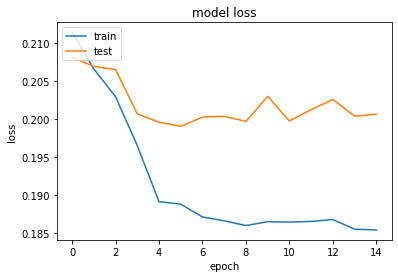

In [27]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
predictions = model.predict(x_test)
predictions

1/1 [==============================] - 1s 691ms/step


array([[0.19380622, 0.34301448, 0.2958303 , ..., 0.18753211, 0.31541204,
        0.01740921],
       [0.19380622, 0.34301448, 0.2958303 , ..., 0.18753211, 0.31541204,
        0.01740921],
       [0.19380622, 0.34301448, 0.2958303 , ..., 0.18753211, 0.31541204,
        0.01740921],
       ...,
       [0.19381519, 0.34303284, 0.29583552, ..., 0.18752192, 0.31544083,
        0.01740373],
       [0.19381519, 0.34303284, 0.29583552, ..., 0.18752192, 0.31544083,
        0.01740373],
       [0.19381519, 0.34303284, 0.29583552, ..., 0.18752192, 0.31544083,
        0.01740373]], dtype=float32)

In [29]:
#Model Evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 0s 40ms/step


0.0007856097764521837

In [34]:
#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-10:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#calculate excessive return
er = 0
time_index = 0
aer = 0
for stock_list in stock_selection:
  for stock in stock_list:
    er = er + er_return[stock][325 + n_past + time_index]
  time_index = time_index+1

#aer = math.pow((1+er), 12/len(stock_selection))-1
aer = er*12/len(stock_selection)
print("Excessive return is", er*100, "%")
print("Annual Excessive return is", aer*100, "%")

Excessive return is 96.20104235041332 %
Annual Excessive return is 46.176500328198394 %


In [35]:
stock_selection

[['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', 'KLAC', 'TYL', 'HOLX', 'TER', 'MU'],
 ['UNH', 'ALK', 'TXT', 'MRK', 'HUM', '

# GRU

In [22]:
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network
from keras.optimizers import SGD

In [31]:
x_train

array([[[0.00829646, 0.02112893, 0.03743942, ..., 0.        ,
         0.13743693, 1.        ],
        [0.01272124, 0.04111232, 0.01256148, ..., 0.        ,
         0.13743693, 1.        ],
        [0.01465708, 0.01592307, 0.02193694, ..., 0.        ,
         0.13743693, 1.        ],
        ...,
        [0.01285951, 0.01333923, 0.01802588, ..., 0.        ,
         0.13743693, 1.        ],
        [0.0053927 , 0.02963142, 0.02357194, ..., 0.        ,
         0.13743693, 1.        ],
        [0.00636062, 0.03099335, 0.00998338, ..., 0.        ,
         0.13743693, 1.        ]],

       [[0.01272124, 0.04111232, 0.01256148, ..., 0.        ,
         0.13743693, 1.        ],
        [0.01465708, 0.01592307, 0.02193694, ..., 0.        ,
         0.13743693, 1.        ],
        [0.01645465, 0.00976259, 0.00220594, ..., 0.        ,
         0.13743693, 1.        ],
        ...,
        [0.0053927 , 0.02963142, 0.02357194, ..., 0.        ,
         0.13743693, 1.        ],
        [0.0

In [39]:
%%time
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=1024, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=512, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=500, return_sequences=True, input_shape=(n_past, x_dataset.shape[1]), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=500, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=500))
# Compiling the RNN
regressorGRU.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')
#regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights_GRU.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

# Fitting to the training set
history = regressorGRU.fit(x_train, y_train, shuffle=True, epochs=15, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=10)

Epoch 1/15
25/26 [===========================>..] - ETA: 0s - loss: 1.0119
Epoch 1: val_loss improved from inf to 0.30870, saving model to weights_GRU.h5
26/26 [==============================] - 7s 99ms/step - loss: 0.9908 - val_loss: 0.3087 - lr: 0.0100
Epoch 2/15
26/26 [==============================] - ETA: 0s - loss: 0.4706
Epoch 2: val_loss improved from 0.30870 to 0.28544, saving model to weights_GRU.h5
26/26 [==============================] - 1s 49ms/step - loss: 0.4706 - val_loss: 0.2854 - lr: 0.0100
Epoch 3/15
25/26 [===========================>..] - ETA: 0s - loss: 0.4386
Epoch 3: val_loss did not improve from 0.28544
26/26 [==============================] - 1s 20ms/step - loss: 0.4379 - val_loss: 0.3000 - lr: 0.0100
Epoch 4/15
25/26 [===========================>..] - ETA: 0s - loss: 0.4198
Epoch 4: val_loss did not improve from 0.28544
26/26 [==============================] - 1s 20ms/step - loss: 0.4186 - val_loss: 0.3180 - lr: 0.0100
Epoch 5/15
24/26 [======================

In [40]:
#Model Evaluation
predictions = regressorGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 1s/step


0.0036296451542526483

In [41]:
#calculate the top 10 stock we picked
stock_selection_index = np.argsort(predictions)[:,-10:]
stock_selection = []
for index in stock_selection_index:
  stock_list = []
  for stock_i in index:
    stock_list.append(SP500_ticker[stock_i])
  stock_selection.append(stock_list)

#calculate excessive return
er = 0
time_index = 0
aer = 0
for stock_list in stock_selection:
  for stock in stock_list:
    er = er + er_return[stock][325 + n_past + time_index]
  time_index = time_index+1

#aer = math.pow((1+er), 12/len(stock_selection))-1
aer = er*12/len(stock_selection)
print("Excessive return is", er*100, "%")
print("Annual Excessive return is", aer*100, "%")

Excessive return is 152.77858933896295 %
Annual Excessive return is 73.3337228827022 %


dict_keys(['loss', 'val_loss', 'lr'])


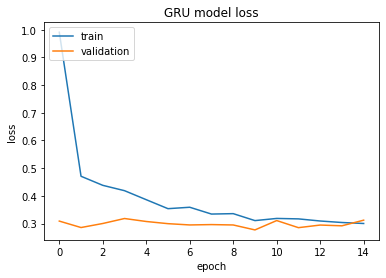

In [43]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Method 1:
We use the LSTM model training on a monthly basis. y as 1 or 0.

#Method 2:
We use the LSTM model training on a daily basis. y as the price prediction and then use the excessive return as the selection method.

In [ ]:
#Method2
